In [351]:
# Importando as bibliotecas 
import numpy as np
import pandas as pd
import twitter
import json
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


%matplotlib inline
 

In [307]:
df_twitter = pd.read_csv("BaseTwitter -ORIGINAL.csv",sep=",",encoding="ISO-8859-1")

In [308]:
base_treinamento, base_teste=train_test_split(df_twitter)  #75% para treino e 25% para teste

In [309]:
# Transforma base em pandas
Analise_Treinamento=pd.DataFrame(base_treinamento)

#Dá nome as colunas
Analise_Treinamento.columns=['Frase','Sentimento']

# Mostra tamanho da base de treinamento
print('Tamanho da base de Treinamento {}'.format(Analise_Treinamento.shape[0]))

# Mostra quantidade de cada tipo de sentimento
Analise_Treinamento.Sentimento.value_counts()

Tamanho da base de Treinamento 2998


alegria     1576
tristeza    1422
Name: Sentimento, dtype: int64

In [310]:
# Percentual de cada tipo de sentimento
print((Analise_Treinamento.Sentimento.value_counts()/Analise_Treinamento.shape[0])*100)

alegria     52.568379
tristeza    47.431621
Name: Sentimento, dtype: float64


In [311]:
# Criar base teste
# Transforma base em pandas
Analise_Teste=pd.DataFrame(base_teste)

#Dá nome as colunas
Analise_Teste.columns=['Frase','Sentimento']

# Mostra tamanho da base de treinamento
print('Tamanho da base de Teste {}'.format(Analise_Teste.shape[0]))

# Mostra quantidade de cada tipo de sentimento
Analise_Teste.Sentimento.value_counts()

Tamanho da base de Teste 1000


alegria     510
tristeza    490
Name: Sentimento, dtype: int64

In [312]:
#nltk.download('stopwords')
lista_Stop=nltk.corpus.stopwords.words('portuguese')
np.transpose(lista_Stop)

array(['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para',
       'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as',
       'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou',
       'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo',
       'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo',
       'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa',
       'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos',
       'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas',
       'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus',
       'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos',
       'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele',
       'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está',
       'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram',
       'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos

In [313]:
# Função que retira StopWords
def RemoveStopWords(texto):
    frases=[]
    for (palavras, sentimento) in texto:
        #Criamos uma list compreheension para extrair apenas as palavras que não estão na list_stop
        semStop= [ p for p in palavras.split() if p not in lista_Stop]
        #Inserindo as frases com os Labels (sentimento) ja tatadas pela Lista_Stop
        frases.append((semStop,sentimento))
    return frases

In [314]:
# Steemer= técnica de remover sufixos e prefixos de uma palavra,Por exemplo, o stem da palavra cooking é cook. Um bom algoritmo sabe que “ing” é um sufixo e pode ser removido.
#nltk.download('rslp')
def aplica_Stemmer(texto):
    stemmer=nltk.stem.RSLPStemmer()
    #Escolhido o RSLPS pois é especifico da língua portuguesas
    frases_sem_Stemming=[]
    for (palavras, sentimento) in texto:
        com_Stemming=[str(stemmer.stem(p)) for p in palavras.split() if p not in lista_Stop]
        frases_sem_Stemming.append((com_Stemming,sentimento))
    return frases_sem_Stemming

In [315]:
#Transforma base de treinamento em um array
base_treinamento=np.array(base_treinamento)

In [316]:
# Aplica o Stemer na Frase
# Transformar em vetor está dando problema
frases_com_Stem_treinamento=aplica_Stemmer(base_treinamento)

In [317]:
#Transforma base de teste em um array
base_teste=np.array(base_teste)

In [318]:
# Aplica Stem na base de teste
frases_com_Stem_teste=aplica_Stemmer(base_teste)

In [319]:
# Cria função para retornar as palavras da frase, sem a classificação(sentimento)
def busca_Palavras(frases):
    todas_Palavras=[]
    for (palavras,sentimento) in frases:
        todas_Palavras.extend(palavras)
    return todas_Palavras

In [320]:
# Aplica função acima em cada base
palavras_treinamento=busca_Palavras(frases_com_Stem_treinamento)
palavras_teste=busca_Palavras(frases_com_Stem_teste)

In [321]:
# Mostra quantidade de palavras na base
print ("Quantidade de palavras Treinamento {}".format(pd.DataFrame(palavras_treinamento).count()))
print ("Quantidade de palavras Teste {}".format(pd.DataFrame(palavras_teste).count()))

Quantidade de palavras Treinamento 0    37021
dtype: int64
Quantidade de palavras Teste 0    12943
dtype: int64


In [322]:
# Função para verificar a quantidade de vezes que a palavras é mencionada
def busca_frequencia(palavras):
    palavras=nltk.FreqDist(palavras)
    return palavras

In [323]:
# Chama função acima
frequencia_treinamento=busca_frequencia(palavras_treinamento)

In [324]:
# A função most_common do NLTK possibilita visualizar quais as palavras que ocorrem com maior frequência em nosso texto.
frequencia_treinamento.most_common(20)

[('iphon', 2964),
 ('compr', 568),
 ('quebr', 505),
 ('ganh', 451),
 ('estrag', 412),
 ('nã£', 399),
 ('troq', 392),
 ('molh', 360),
 ('pra', 324),
 ('consert', 314),
 ('q', 300),
 ('celul', 294),
 ('meu', 281),
 ('caiu', 272),
 ('eu', 247),
 ('ã©', 235),
 ('iphone,', 235),
 ('to', 189),
 ('arrum', 179),
 (',', 177)]

In [325]:
# Executa função parecida com a mostcommon
frequencia_teste=busca_frequencia(palavras_teste)

In [326]:
# Função para retornar somente as palavras unicas
def busca_palavras_unicas(frequencia):
    freq=frequencia.keys()
    return freq

# Chama função acima
palavras_unicas_treinamento=busca_palavras_unicas(frequencia_treinamento)
palavras_unicas_teste=busca_palavras_unicas(frequencia_teste)

In [327]:
# Cria função para identificar quais as palavras únicas estão no docuemnto passado para a função
def extrator_palavras(documento):
        #Utilizado set() para associar a variável doc.com o parametro que esta chegando
        doc=set(documento)
        caracteristicas={}
        for palavras in palavras_unicas_treinamento:
            caracteristicas['%s' % palavras]=(palavras in doc)
        return caracteristicas

In [328]:
# devido a necessidade de aplciação da função Extrato_Palavras sobre as bases de Treinamento e Teste, como a variável palavras_unicas_teste exige aplicação isolada, precisamos criar uma função apartada somente
# para a base de teste
def extrator_palavras_teste(documento):
    doc=set(documento)
    caracteristicas={}
    for palavras in palavras_unicas_teste:
        caracteristicas['%s' % palavras]=(palavras in doc)
    return caracteristicas

In [329]:
base_completa_treinamento=nltk.classify.apply_features(extrator_palavras, frases_com_Stem_treinamento)
base_completa_teste=nltk.classify.apply_features(extrator_palavras_teste,frases_com_Stem_teste)

In [330]:
# O algoritmo NaiveBayes monta a tabela de probabilidade
classificador=nltk.NaiveBayesClassifier.train(base_completa_treinamento)
print(classificador.labels())

['alegria', 'tristeza']


In [331]:
print(classificador.show_most_informative_features(10))

Most Informative Features
                       @ = True           triste : alegri =     41.9 : 1.0
                  estrag = True           triste : alegri =     39.1 : 1.0
                    caiu = True           triste : alegri =     36.3 : 1.0
                 consert = True           alegri : triste =     25.1 : 1.0
                   xiaom = True           alegri : triste =     22.6 : 1.0
                  derrub = True           triste : alegri =     19.3 : 1.0
                       ' = True           triste : alegri =     18.8 : 1.0
                       . = True           triste : alegri =     18.4 : 1.0
                 acontec = True           triste : alegri =     15.9 : 1.0
                   quebr = True           triste : alegri =     14.9 : 1.0
None


In [332]:
# Verifica a acuracia do modelo com a base de treinamento
print(nltk.classify.accuracy(classificador,base_completa_treinamento))

0.985657104736491


In [333]:
# Agrega linhas com erros de classificação
erros=[]
for (frase,classe) in base_completa_treinamento:
    #print(frase)
    #print(classe)
    resultado=classificador.classify(frase)
    if resultado != classe:
        erros.append((classe,resultado,frase))

In [334]:
# Cria matriz de confusão para de treinamento
from nltk.metrics import ConfusionMatrix
esperado=[]
previsto=[]
for teste in base_completa_treinamento:
    resultado=classificador.classify(teste[0])
    previsto.append(resultado)
    esperado.append(teste[1])

matriz=ConfusionMatrix(esperado,previsto)
print (matriz)



         |         t |
         |    a    r |
         |    l    i |
         |    e    s |
         |    g    t |
         |    r    e |
         |    i    z |
         |    a    a |
---------+-----------+
 alegria |<1565>  11 |
tristeza |   32<1390>|
---------+-----------+
(row = reference; col = test)



In [335]:
# Cria matriz de confusão para de teste
from nltk.metrics import ConfusionMatrix
esperado=[]
previsto=[]
for teste in base_completa_teste:
    resultado=classificador.classify(teste[0])
    previsto.append(resultado)
    esperado.append(teste[1])
matriz=ConfusionMatrix(esperado,previsto)

print (matriz)



         |       t |
         |   a   r |
         |   l   i |
         |   e   s |
         |   g   t |
         |   r   e |
         |   i   z |
         |   a   a |
---------+---------+
 alegria |<501>  9 |
tristeza |  19<471>|
---------+---------+
(row = reference; col = test)



In [336]:
teste="Comprei um celular novo!"
testeStemming=[]
stemmer=nltk.stem.RSLPStemmer()
for (palavras_treinamento) in teste.split():
    comStem=[p for p in palavras_treinamento.split()]
    testeStemming.append(str(stemmer.stem(comStem[0])))

novo=extrator_palavras(testeStemming)
#print(classificador.classify(novo))
distribuicao = classificador.prob_classify(novo)
resultado_final=classificador.classify(novo)
for classe in distribuicao.samples():
    print('%s: %f' % (classe, distribuicao.prob(classe)))
    
print("Resultado final: "+ resultado_final)
    

alegria: 0.837594
tristeza: 0.162406
Resultado final: alegria


In [337]:
###Vendo no Twitter % de sentimento

In [338]:
#Carrega Arquivo de configuração
with open('tokens.json') as f:
    data = json.load(f)
    
#Carrega a API do Twitter, utilizando os dados do arquivo json:
api = twitter.Api(**data)

# Printa a credencial
print(api.VerifyCredentials())

{"created_at": "Thu Apr 04 00:04:42 +0000 2013", "default_profile": true, "favourites_count": 38, "followers_count": 108, "friends_count": 1326, "id": 1325712606, "id_str": "1325712606", "listed_count": 80, "name": "Gustavo Morozi", "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1325712606/1482203973", "profile_image_url": "http://pbs.twimg.com/profile_images/811048272970338308/Tb1Axe5E_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/811048272970338308/Tb1Axe5E_normal.jpg", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "gustavomorozi", "status": {"created_at": "Sun Mar 15 20:30:57 +0

In [339]:
#Busca por termos
status_list = api.GetSearch(term="iphone -filter:retweets",
                            lang='pt',
                            count=100,
                            result_type='recent' )


# Percorre o Array 
users_locs = [[tweet.text,"Sem resposta"] for tweet in status_list]

# Cria um pandas 
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=["Tweet","Resposta"])


In [340]:
#Transforma base de twitter
base_twitter=np.array(tweet_text)



In [341]:
# Aplica Stem na base de twitter 
frases_com_Stem_twitter=aplica_Stemmer(base_twitter)


In [342]:
# Aplica função acima em cada base
palavras_twitter=busca_Palavras(frases_com_Stem_twitter)


In [343]:
# Mostra quantidade de palavras na base
print ("Quantidade de palavras twitter {}".format(pd.DataFrame(palavras_twitter).count()))



Quantidade de palavras twitter 0    953
dtype: int64


In [344]:
# Executa função parecida com a mostcommon
frequencia_twitter=busca_frequencia(palavras_twitter)

In [345]:
palavras_unicas_twitter=busca_palavras_unicas(frequencia_twitter)

In [346]:
# devido a necessidade de aplciação da função Extrato_Palavras sobre as bases de Treinamento e Teste, como a variável palavras_unicas_teste exige aplicação isolada, precisamos criar uma função apartada somente
# para a base de teste
def extrator_palavras_twitter(documento):
    doc=set(documento)
    caracteristicas={}
    for palavras in palavras_unicas_twitter:
        caracteristicas['%s' % palavras]=(palavras in doc)
    return caracteristicas

In [347]:
# Ver % twitter
res=[]
for teste in base_completa_twitter:
    resultado=classificador.classify(teste[0])
    res.append(resultado)

In [348]:
values, counta = np.unique(res, return_counts=True)
total=counta[0]+counta[1]

print ("************************** Quantidade **************************")
print (values[0],":",counta[0])
print (values[1],":",counta[1])

print ("************************** Percentual **************************")
print (values[0],":",round(counta[0]/total*100,2),"%")
print (values[1],":",round(counta[1]/total*100,2),"%")


************************** Quantidade **************************
alegria : 56
tristeza : 44
************************** Percentual **************************
alegria : 56.0 %
tristeza : 44.0 %


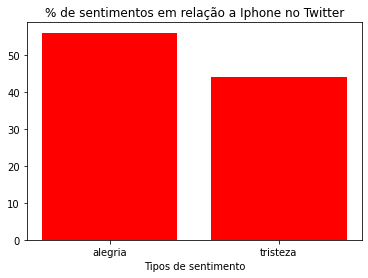

In [358]:
Counta_perc=counta/total*100 #Transforma em %
plt.bar(values, Counta_perc,color="red")
plt.title("% de sentimentos em relação a Iphone no Twitter")
plt.xlabel("Tipos de sentimento")
plt.show()